In [1]:
import os
os.chdir(os.path.dirname(os.getcwd()))

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
# add MAE
from sklearn.metrics import mean_absolute_error

In [32]:
solar

,building_0,building_1,building_2,building_3,building_4,building_5,building_6,time_step
0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,1.108159,3.232911e-01,1.130895,0.529871,0.323291,0.805919,0.875852,1
2,0.952937,5.096603e-01,0.952937,0.643276,0.509660,0.770227,0.792368,2
3,0.895037,5.714880e-01,0.895037,0.657891,0.571488,0.724344,0.755123,3
4,0.836170,5.946057e-01,0.836170,0.681886,0.594606,0.729306,0.733063,4
...,...,...,...,...,...,...,...,...
8756,1.768622,1.188365e-07,0.751239,1.568285,0.021871,3.148282,4.032492,8756
8757,1.857543,8.478152e-08,1.046897,0.980626,0.011853,2.515062,3.846793,8757
8758,1.709271,-4.778866e-03,0.832873,1.178345,0.012506,1.780828,3.039199,8758
8759,1.793437,-2.909019e-02,0.666712,1.517477,-0.024208,1.474691,1.837633,8759


In [33]:
solar= pd.read_csv('data/solar_left_phase3.csv')
solar['time_step'] = solar.index
solar_m = solar.melt(id_vars=['time_step'], var_name='building', value_name='net_target')
soalr_m = solar_m.sort_values(by=['time_step', 'building'])
solar_m['building'] = solar_m['building'].str[-1].astype(int)
lead_times = [f'+{i}h' for i in range(24)]
# upload min-max scaler from scalers folders with .save extension
solar_norm = pd.DataFrame()
for building in range(7):
    solar_norm_temp = pd.DataFrame()
    solar_norm_temp['time_step'] = solar_m.loc[solar_m['building'] == building, 'time_step']
    solar_norm_temp['building'] = building
    solar_norm_temp['net_target'] = solar_m.loc[solar_m['building'] == building, 'net_target']
    for i, lead_time in enumerate(lead_times):
        solar_norm_temp[lead_time] = solar_norm_temp['net_target'].shift(-int(i))
    solar_norm = pd.concat([solar_norm, solar_norm_temp], axis=0)
solar_norm = solar_norm.dropna()
solar_norm = solar_norm.sort_values(by=['time_step', 'building'])
# drop the net_target column
solar_norm = solar_norm.drop(columns=['net_target'])
# set the index to time_step and building
solar_norm = solar_norm.set_index(['time_step', 'building'])
solar_norm

+0h           +1h           +2h           +3h  \
time_step building                                                       
0         0         1.108159  9.529374e-01  8.950374e-01  8.361698e-01   
          1         0.323291  5.096603e-01  5.714880e-01  5.946057e-01   
          2         1.130895  9.529374e-01  8.950374e-01  8.361698e-01   
          3         0.529871  6.432765e-01  6.578910e-01  6.818864e-01   
          4         0.323291  5.096603e-01  5.714880e-01  5.946057e-01   
...                      ...           ...           ...           ...   
8736      2         0.591351  5.124311e-01  4.976636e-01  5.579717e-01   
          3         0.454781  5.481099e-01  5.690132e-01  3.225806e-01   
          4        -0.007016  1.089650e-07  1.085196e-07  1.273330e-07   
          5         1.196246  1.234909e+00  1.139203e+00  1.284206e+00   
          6         1.667704  1.372523e+00  1.241146e+00  8.175456e-01   

                             +4h       +5h       +6h       +7h       +8h  \
time_step building                                                         
0         0         8.098568e-01  0.839004  0.687108  0.111212 -0.429980   
          1         6.368472e-01  0.674240  0.591666  0.037551 -0.485595   
          2         8.098568e-01  0.839004  0.687108  0.111212 -0.430043   
          3         6.944832e-01  0.722720  0.590283  0.064202 -0.454640   
          4         6.368472e-01  0.674240  0.591666  0.037551 -0.485595   
...                          ...       ...       ...       ...       ...   
8736      2         4.344526e-01  0.431452  0.725357  0.550477  0.175882   
          3         2.845209e-01  0.277505  0.284752  0.217669 -0.064944   
          4         1.214083e-07  0.082770  0.345600  1.024580  1.942312   
          5         1.452902e+00  1.454279  1.292784 -0.386631  0.341304   
          6         8.605670e-01  1.035217  0.353952 -0.686808 -0.985979   

                         +9h  ...      +14h      +15h      +16h      +17h  \
time_step building            ...                                           
0         0        -0.876611  ... -0.691382  0.266271  0.711764  1.231934   
          1        -0.903779  ... -0.669968  0.280011  0.681627  1.181309   
          2        -0.874133  ... -0.691382  0.266105  0.711912  1.231934   
          3        -0.887979  ... -0.674543  0.260035  0.671301  1.186248   
          4        -0.903779  ... -0.669968  0.280011  0.681627  1.181309   
...                      ...  ...       ...       ...       ...       ...   
8736      2        -0.577235  ... -1.020246 -1.237679 -0.820871 -0.154372   
          3        -0.504271  ...  0.714190  0.820486  1.248719  2.166624   
          4         2.210136  ...  2.461824  1.613606  1.337797  0.567376   
          5         0.320154  ...  0.323308  0.562628  1.049872  0.980789   
          6        -1.298751  ...  1.615415  2.503403  3.483278  3.859956   

                        +18h      +19h      +20h      +21h      +22h      +23h  
time_step building                                                              
0         0         1.512884  1.355655  1.413401  1.406286  1.455585  1.238483  
          1         1.433856  1.314948  1.343285  1.291011  1.234908  0.859436  
          2         1.512884  1.354668  1.413401  1.406286  1.455585  1.238739  
          3         1.439446  1.337567  1.366263  1.302416  1.267724  0.989886  
          4         1.433856  1.314948  1.343285  1.291011  1.234908  0.859436  
...                      ...       ...       ...       ...       ...       ...  
8736      2         0.666461  0.751239  1.046897  0.832873  0.666712  0.577495  
          3         1.507326  1.568285  0.980626  1.178345  1.517477  0.868623  
          4        -0.135902  0.021871  0.011853  0.012506 -0.024208 -0.013825  
          5         2.511847  3.148282  2.515062  1.780828  1.474691  1.201895  
          6         4.075224  4.032492  3.846793  3.039199  1.837633  1.505911  

[61159 rows x 24 

In [34]:
julians = pd.read_csv('data/together_forecast/phase_3_forecast_sampled_1h.csv')
julians

,time_step,scenario,building,+0h,+1h,+2h,+3h,+4h,+5h,+6h,...,+14h,+15h,+16h,+17h,+18h,+19h,+20h,+21h,+22h,+23h
0,0,0,0,1.108159,0.952937,0.895037,0.836170,0.809857,0.839004,0.687108,...,-0.691382,0.266271,0.711764,1.231934,1.512884,1.355655,1.413401,1.406286,1.455585,1.238483
1,0,0,1,0.323291,0.509660,0.571488,0.594606,0.636847,0.674240,0.591666,...,-0.669968,0.280011,0.681627,1.181309,1.433856,1.314948,1.343285,1.291011,1.234908,0.859436
2,0,0,2,1.130895,0.952937,0.895037,0.836170,0.809857,0.839004,0.687108,...,-0.691382,0.266105,0.711912,1.231934,1.512884,1.354668,1.413401,1.406286,1.455585,1.238739
3,0,0,3,0.529871,0.643276,0.657891,0.681886,0.694483,0.722720,0.590283,...,-0.674543,0.260035,0.671301,1.186248,1.439446,1.337567,1.366263,1.302416,1.267724,0.989886
4,0,0,4,0.323291,0.509660,0.571488,0.594606,0.636847,0.674240,0.591666,...,-0.669968,0.280011,0.681627,1.181309,1.433856,1.314948,1.343285,1.291011,1.234908,0.859436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61315,8759,0,2,0.698066,0.596489,0.547631,0.554751,0.560215,0.468894,0.512191,...,-1.598829,-0.991041,-1.177272,-0.808569,-0.116398,0.793366,0.773687,1.063134,0.944060,0.766505
61316,8759,0,3,0.983195,0.507087,0.581777,0.519443,0.380425,0.318427,0.315241,...,0.691031,0.955694,1.015017,1.333128,2.175574,1.412085,1.500392,1.025895,1.145050,1.534916
61317,8759,0,4,0.304050,0.117322,0.197688,0.197372,0.275058,0.246635,0.405497,...,2.442411,2.628395,1.933629,1.819645,1.252357,0.301022,0.345424,0.290214,0.276149,0.250423
61318,8759,0,5,1.253717,1.243149,1.231042,1.171024,1.297621,1.345405,1.371322,...,-1.018511,-0.238978,0.460956,0.866744,1.105025,2.372571,2.746750,2.278559,1.893020,1.488648


In [35]:
power = pd.read_csv('debug_logs/real_power_gurobi_phase_1_step_leap_1_forecast_step_1.csv')
power = power.melt(id_vars=['time_step'], var_name='building', value_name='net_target')
power = power.sort_values(by=['time_step', 'building'])
power['building'] = power['building'].str[-1].astype(int)
power = power[power['time_step'] != -1]
lead_times = [f'+{i}h' for i in range(24)]
# upload min-max scaler from scalers folders with .save extension
power_norm = pd.DataFrame()
for building in range(5):
    power_norm_temp = pd.DataFrame()
    power_norm_temp['time_step'] = power.loc[power['building'] == building, 'time_step']
    power_norm_temp['building'] = building
    power_norm_temp['net_target'] = power.loc[power['building'] == building, 'net_target']
    for i, lead_time in enumerate(lead_times):
        power_norm_temp[lead_time] = power_norm_temp['net_target'].shift(-int(i))
    power_norm = pd.concat([power_norm, power_norm_temp], axis=0)
power_norm = power_norm.dropna()
power_norm = power_norm.sort_values(by=['time_step', 'building'])
# drop the net_target column
power_norm = power_norm.drop(columns=['net_target'])
# set the index to time_step and building
power_norm = power_norm.set_index(['time_step', 'building'])
power_norm

+0h           +1h           +2h           +3h  \
time_step building                                                           
0         0         8.511667e-01  8.346000e-01  8.381667e-01  1.478433e+00   
          1         1.370667e+00  1.101250e+00  5.432167e-01  5.428333e-01   
          2         1.018524e-07  1.008352e-07  1.007080e-07  1.015981e-07   
          3         1.928167e+00  4.758167e-01  4.582333e-01  4.460167e-01   
          4         5.158833e-01  5.030500e-01  5.359500e-01  5.126167e-01   
...                          ...           ...           ...           ...   
8735      0         1.581708e+00  5.796833e-01  5.926500e-01  5.763333e-01   
          1         2.289758e+00  5.151167e-01  7.532500e-01  7.767167e-01   
          2         7.067500e-01  4.349000e-01  4.231333e-01  4.464667e-01   
          3         3.510683e+00  2.099967e+00  2.567050e+00  5.842667e-01   
          4         1.343600e+00  9.951167e-01  9.510333e-01  6.088167e-01   

                             +4h       +5h       +6h       +7h       +8h  \
time_step building                                                         
0         0         1.256200e+00  1.811500  0.362733 -0.489917 -1.184867   
          1         1.512433e+00  0.326250  0.560617  1.119483  0.750300   
          2         9.943644e-08 -0.027283 -0.136700 -0.034533 -0.870133   
          3         4.658833e-01  0.637133  0.698950  2.152567  1.689017   
          4         3.032167e-01  0.378583  0.274750 -0.070083 -0.254483   
...                          ...       ...       ...       ...       ...   
8735      0         5.861833e-01  0.590600  0.770317  0.220983 -0.395883   
          1         1.895200e+00  0.350383  0.319250  0.222683  0.344467   
          2         3.864667e-01  0.377350  0.314100  0.235600 -0.065217   
          3         7.306833e-01  1.942067  0.466517  0.851900  2.077183   
          4         5.943000e-01  0.376467  0.444233 -0.149983 -0.809817   

                         +9h  ...      +14h      +15h      +16h      +17h  \
time_step building            ...                                           
0         0        -1.809783  ... -0.595117 -0.298267  0.059700  1.054850   
          1         1.267583  ...  0.935333  0.204017 -0.572450 -0.678733   
          2        -1.072783  ... -1.413883 -1.743550 -1.656633 -0.879733   
          3         0.454667  ... -1.972850 -2.074017 -0.055433  0.160417   
          4        -0.173250  ... -0.109050 -0.137150  0.023717  2.313683   
...                      ...  ...       ...       ...       ...       ...   
8735      0        -0.990800  ... -0.199817  0.115850  0.803650  2.636517   
          1         1.418433  ...  0.944117  1.083967 -1.310933 -1.106450   
          2        -0.654550  ... -1.414011 -0.635250 -0.525617  0.284317   
          3         0.415717  ...  0.192433 -0.329417  0.222217  1.017867   
          4        -1.397767  ...  0.522200  1.169617  1.663533  3.119600   

                        +18h          +19h          +20h          +21h  \
time_step building                                                       
0         0         1.006983  3.603983e+00  5.008500e+00  3.896217e+00   
          1        -0.069417  3.583334e-01  1.584500e+00  2.561233e+00   
          2        -0.045600  1.011848e-07  1.003265e-07  1.000817e-07   
          3         0.149917  1.557933e+00  2.832317e+00  6.387667e-01   
          4         1.957267  1.498883e+00  2.606917e+00  1.278900e+00   
...                      ...           ...           ...           ...   
8735      0         2.050225  1.314867e+00  2.566167e+00  3.151700e+00   
          1        -0.390500  1.502683e+00  8.031333e-01  2.194633e+00   
          2         0.729533  1.417733e+00  1.075767e+00  1.162883e+00   
          3         1.267433  1.591967e+00  3.894333e-01  1.186483e+00   
          4         3.839883  2.713900e+00  9.358333e-01  2.155017e+00   

                            +22h          +23h  
time_step b

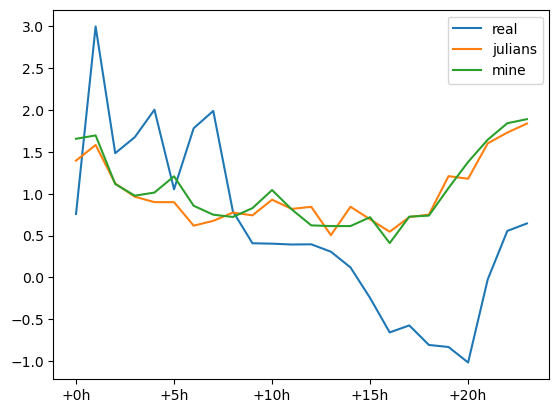

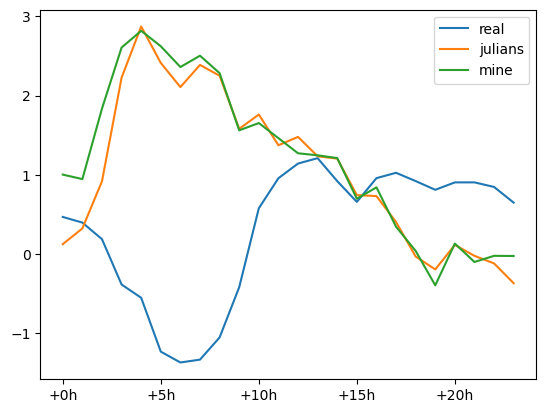

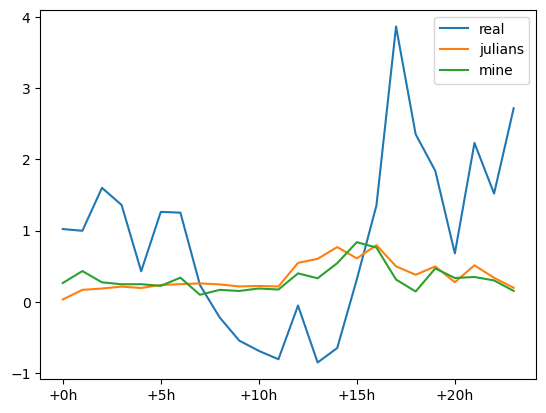

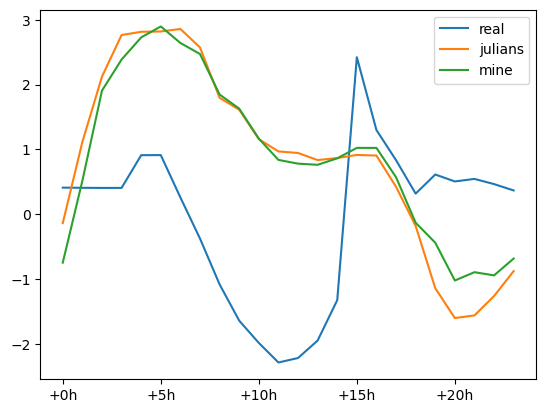

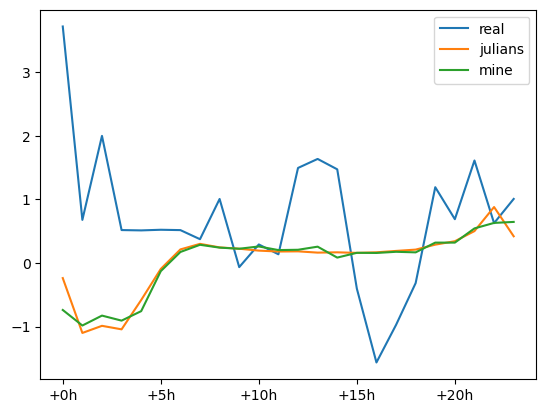

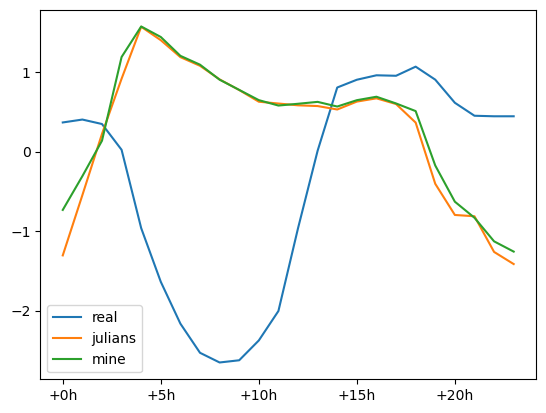

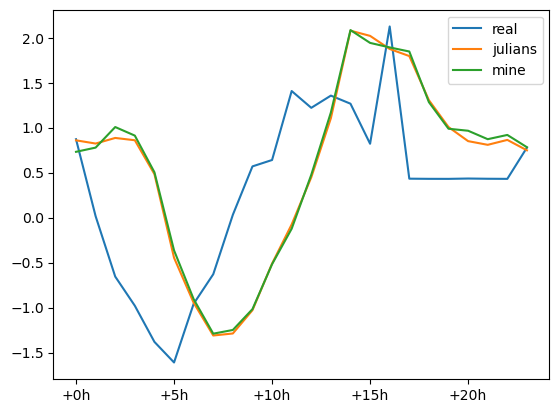

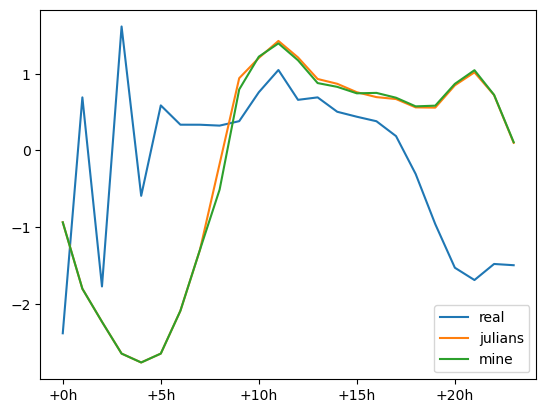

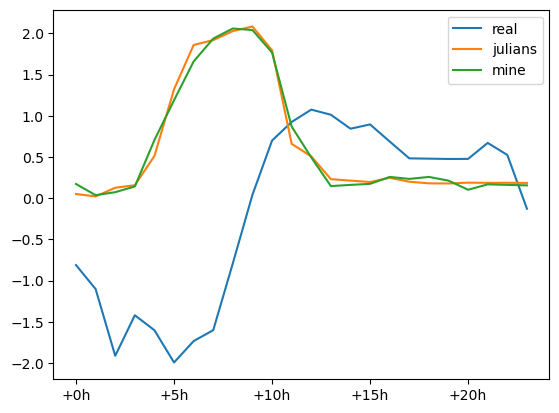

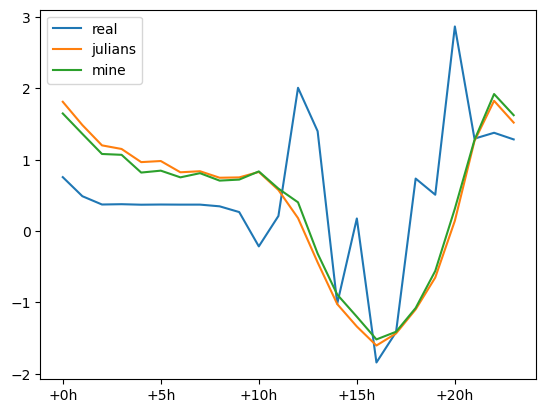

In [36]:
# pick random 5 numbers from 0 to len(power_norm_temp)
x_list = np.random.randint(0, len(power_norm_temp), 10)
power_norm_temp = power_norm.loc[power_norm.index.get_level_values('building') == 1]
solar_norm_temp = solar_norm.loc[solar_norm.index.get_level_values('building') == 1]
julians_temp = julians.loc[julians['building'] == 1]
for x in x_list:
    power_norm_temp.iloc[x].loc[lead_times].plot(label='real')
    julians.iloc[x].loc[lead_times].plot(label='julians')
    solar_norm.iloc[x].loc[lead_times].plot(label='mine')
    plt.legend()
    plt.show()
    #print(f'MAE: {np.abs(power_norm_temp.iloc[x] - tog_forecast_temp.iloc[x]).mean(axis=0)}')
    #print(f'MAE naive: {np.abs(power_norm_temp.iloc[x] - power_norm_temp.shift(24).iloc[x]).mean(axis=0)}')
